In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
from collections import Counter

In [3]:
# load dataset
# yes, the good old iris dataset
# just using this one to understand KNN
# larger datasets are not being used since KNN complexity will be very high 
# due to a large number of Euclidean distance calculations
data = pd.DataFrame(pd.read_csv("iris.csv"))
print("data size: ", data.shape)
# shuffle
data = data.sample(frac=1)
data.head()

data size:  (150, 5)


,s_length,s_width,p_length,p_width,class
35,5.0,3.2,1.2,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
# using sepal length and width for two classes
inputs = np.array(data)[:, 0:2].astype(float)
# length of the entire dataset
m = np.size(inputs[:, 0])

# target vector
labels = np.zeros([m, 1], dtype = float)
for i, d in enumerate(data['class']):
    if d == 'Iris-setosa':
        labels[i, 0] = 0
    elif d == 'Iris-versicolor':
        labels[i, 0] = 1
    else:
        labels[i, 0] = 2    

In [5]:
# train test split
train_inputs = inputs[0:120, :]
train_labels = labels[0:120, :]

test_inputs = inputs[120:, :]
test_labels = labels[120:, :]

print("training inputs: ", train_inputs.shape)
print("training labels: ", train_labels.shape)
print("testing inputs : ", test_inputs.shape)
print("testing inputs : ", test_labels.shape)

training inputs:  (120, 2)
training labels:  (120, 1)
testing inputs :  (30, 2)
testing inputs :  (30, 1)


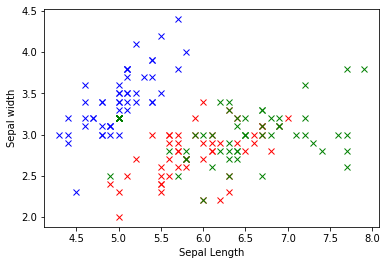

In [6]:
# visualising
plt.plot(inputs[np.where(labels == 1), 0], inputs[np.where(labels == 1), 1], 'xr')
plt.plot(inputs[np.where(labels == 0), 0], inputs[np.where(labels == 0), 1], 'xb')
plt.plot(inputs[np.where(labels == 2), 0], inputs[np.where(labels == 2), 1], 'xg')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.show()
print()

In [7]:
# K-nearest neighbor algorithm

class KNN:
    def __init__(self, k, input_val, target_class):
        """
        initialise knn classifier
        k: k nearest values
        input_val: values of sepal width and length
        target_class: target class
        """
        
        self.k = k
        self.input_val = input_val
        self.target_class = target_class
        
        
    def euclidean(self, point1, point2):
        """ returns the euclidean distance between two points
        
        point1 and point2 are points for which Euclidean distance 
        is to be calculated
        
        """
        # reshape (2,) to (2,1)
        point2 = point2.reshape((len(point2), 1))
        
        one = np.square(point1[0,0] - point2[0,0])
        two = np.square(point1[1,0] - point2[1,0])
        
        return np.sqrt(one+two)
        
        
    def classifier(self, sample):
        """ Function implements K nearest neighbour algorithm
            
            sample: unknown value to classified
        """
        
        # dictionary {int value:label name}
        label_map = {0.: 'Iris-setosa', 
                     1.0: 'Iris-versicolor',
                     2.0: 'Iris-virginica'}

        # step 1: load sample
        # check if sample dimensions are correct
        # reshape to correct dimension
        if sample.size == 2:
            if sample.shape != (2,0):
                sample = sample.reshape((2,1))
        else:
            print("invalid sample!")
            return
                
        # step 2: take Euclidean distance of every point in the inputs
        # with the sample point
        
        euc = {i:self.euclidean(sample, point) for i,point in enumerate(self.input_val)}
        
        # step 2: sort the dictionary of Euclidean distances and 
        # take indices of k smallest distances
        sort_dist = sorted(euc.items(), key=operator.itemgetter(1))
        
        min_index = []
        # for k minimum distances
        for i in range(self.k):
            # append index of k minimum distances 
            min_index.append(sort_dist[i][0])
        
        # step 3: get the labels at those indices
        target = labels[min_index]
        # get the count of the unique labels
        val, count = np.unique(target, return_counts = True)
        # make a dictionary {label:count}
        val_count_pair = {i:j for i,j in zip(val,count)}
        
        # step 4: return the label with maximum count
        max_count_label = max(val_count_pair)
        
        # return the name of the class for the class label
        # by looking it up in the label_map dictionary
        return label_map[max_count_label]

In [8]:
# predicting on known values
known_value_prediction = KNN(3, train_inputs, train_labels)
train_pred = []
for i in train_inputs:
    train_pred.append(known_value_prediction.classifier(np.array(i)))
    
# predicting on unknown values by providing unknown samples from test set
# and the entire dataset in the object
unknown_value_prediction = KNN(4, inputs, labels)
test_pred = []
for i in test_inputs:
    test_pred.append(unknown_value_prediction.classifier(np.array(i)))


In [9]:
# checking accuracy for train and test set
train_true_count = len(np.where(train_pred == data['class'][0:120])[0])
train_acc = train_true_count/len(train_inputs)

test_true_count = len(np.where(test_pred == data['class'][120:])[0])
test_acc = test_true_count/len(test_inputs)


In [10]:
print("Train set Accuracy : ", train_acc*100,"%")
print("Test set Accuracy  : ", test_acc*100,"%")

Train set Accuracy :  83.33333333333334 %
Test set Accuracy  :  73.33333333333333 %
